## 1. Install and Import Dependencies

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 
import requests
from PIL import Image
from io import BytesIO

## 2. Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

## 3. Make Detections

In [ ]:
url = 'https://i.pinimg.com/736x/a4/bb/e5/a4bbe539c2a687f07453b117fc1196c9.jpg'

In [ ]:
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))  # Chuyển thành PIL.Image
else:
    raise Exception("Không thể tải ảnh từ URL")

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## 4. Real Time Dectections and Object Dectection using Video

In [ ]:
cap = cv2.VideoCapture(0) # truy cap webcam
while cap.isOpened(): # kiem tram webcam mo hay dong
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('PHƯN', np.squeeze(results.render())) # mang hinh hien thi, "PHƯN" la ten
    if cv2.waitKey(10) & 0xFF in [ord('\r'), ord('\n')]: # nhan phim enter de thoat
        break
cap.release()
cv2.destroyAllWindows()

## 5. Train a Custom YOLO Model

In [ ]:
import uuid # tao ma dinh danh duy nhat
import os
import time

In [ ]:
IMAGES_PART = os.path.join('data', 'images')
labels = ['awake', 'drowsy'] # 2 trang thai tinh tao va bun ngu
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
for label in labels: # vong lap cua 2 trang thai
    print('Collecting images for {}'. format(label))
    time.sleep(5) 
    for img_num in range(number_imgs):  # thu thap 20 hinh anh cho moi trang thai
        print('Collecting images for {}, images number {}'.format(label, img_num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PART, label+'.'+str(uuid.uuid1())+'.jpg') # dat ten cho anh thu duoc
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image collection', frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF in [ord('\r'), ord('\n')]: # nhan phim enter de thoat
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/HumanSignal/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resource.py resources.qrc

In [82]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --worker 2

Command 'git fetch origin' returned non-zero exit status 128.

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
fatal: full write to remote helper failed: Broken pipe
fatal: cannot change to 'D:\HK2': No such file or directory
YOLOv5  2025-3-13 Python-3.9.13 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8,

## 6. Detecting Drowsiness

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp12/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Phuong/.cache\torch\hub\master.zip
YOLOv5  2025-3-14 Python-3.9.13 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [84]:
img = os.path.join('data', 'images', 'drowsy.2ba723ff-002b-11f0-ae8a-145afc697e34.jpg')

In [85]:
results = model(img)

C:\Users\Phuong/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [86]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 8.7ms pre-process, 11.5ms inference, 125.5ms NMS per image at shape (1, 3, 480, 640)


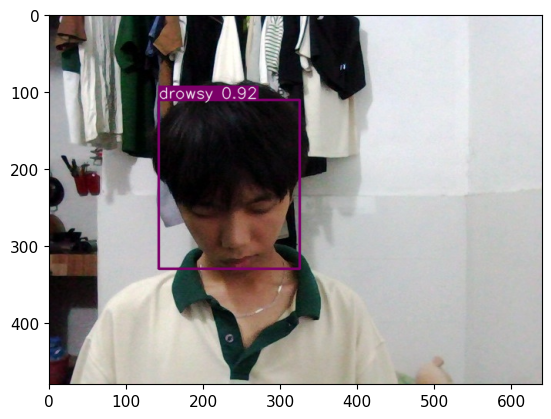

In [87]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0) # truy cap webcam
while cap.isOpened(): # kiem tram webcam mo hay dong
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('PHƯN', np.squeeze(results.render())) # mang hinh hien thi, "PHƯN" la ten
    if cv2.waitKey(10) & 0xFF in [ord('\r'), ord('\n')]: # nhan phim enter de thoat
        break
cap.release()
cv2.destroyAllWindows()